# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 


Дополнительно измерим *AUC-ROC*, сравнивая её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-моделей" data-toc-modified-id="Тестирование-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование моделей</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

План работы:
1) Загрузить и изучить данные

2) Подготовка данных

3) Обучить несколько моделей и выбрать лучшую

4) Сделать тесты модели

## Подготовка данных

**1.1 Загрузка и изучение данных**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Как мы видим из общей информации о данных - в датасете 10 000 строк, также у нас есть 13 признаков и 1 целевой признак.

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [5]:
data.duplicated().sum()

0

**Итог:** В данных есть ненужные столбцы, которые можно удалить. Также есть пропуски в колонке "Tenure" (сколько лет человек является клиентом банка), это может означать, что у клиента нет недвижимости. Значит можно просто заменить эти пропуски на значение "-1" и перевести в целочисленный тип данных. Дубликаты в датасете не обнаружены.

**1.2 Подготовка данных**

In [6]:
# Заполним пропуски в колонке Tenure и преобразуем в целелочисленный тип данных

data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median()).astype('int64')

In [7]:
# Проверим заполнение ячеек

data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# Удалим ненужные колонки 

drop=['EstimatedSalary','CustomerId','Surname', 'RowNumber']
data=data.drop(drop,axis=1)

In [9]:
# Проверим удаление

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CreditScore     10000 non-null  int64  
 1   Geography       10000 non-null  object 
 2   Gender          10000 non-null  object 
 3   Age             10000 non-null  int64  
 4   Tenure          10000 non-null  int64  
 5   Balance         10000 non-null  float64
 6   NumOfProducts   10000 non-null  int64  
 7   HasCrCard       10000 non-null  int64  
 8   IsActiveMember  10000 non-null  int64  
 9   Exited          10000 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 781.4+ KB


## Исследование задачи

**2.1 Проверим корреляцию и построим графики соотношения признаков**

In [10]:
#сразу проверим корреляцию по всем признакам

data.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
CreditScore,1.000000,-0.003965,-0.000060,0.006268,0.012238,-0.005458,0.025651,-0.027094
Age,-0.003965,1.000000,-0.012606,0.028308,-0.030680,-0.011721,0.085472,0.285323
Tenure,-0.000060,-0.012606,1.000000,-0.007535,0.011409,0.025979,-0.030681,-0.015989
Balance,0.006268,0.028308,-0.007535,1.000000,-0.304180,-0.014858,-0.010084,0.118533
NumOfProducts,0.012238,-0.030680,0.011409,-0.304180,1.000000,0.003183,0.009612,-0.047820
HasCrCard,-0.005458,-0.011721,0.025979,-0.014858,0.003183,1.000000,-0.011866,-0.007138
IsActiveMember,0.025651,0.085472,-0.030681,-0.010084,0.009612,-0.011866,1.000000,-0.156128
Exited,-0.027094,0.285323,-0.015989,0.118533,-0.047820,-0.007138,-0.156128,1.000000


Как видно из таблицы все признаки имеют не сильную корреляцию с целевым признаком.

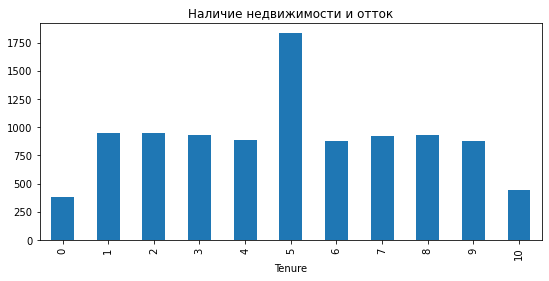

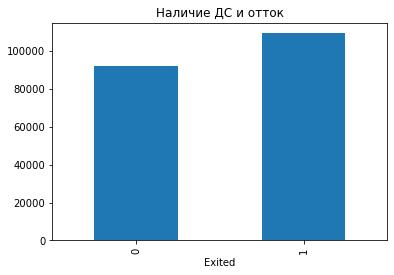

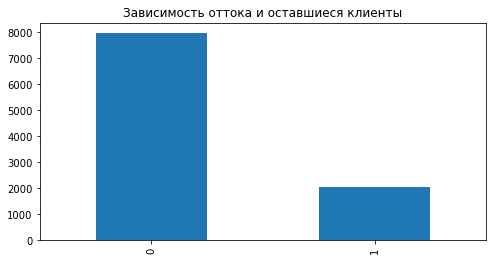

In [11]:
# Проверим зависимости через гистограммы

# Как зависит наличие недвижимости и отток клиентов. 
# Заодно исключим из результатов раннее заполненные значения в колонке кол-ва недвижимости у клиента.
# Т.к. данных по таким клиентам нет.

data = data.query('Tenure >= 0')
data.groupby('Tenure')['Exited'].count().plot(figsize=(9,4),kind='bar',title='Наличие недвижимости и отток')
plt.show()

# Зависимость наличия медианы ДС на балансе у клиента и оттока 
data.groupby('Exited')['Balance'].median().plot(kind='bar',title='Наличие ДС и отток')
plt.show()

# Как зависит отток и оставшиеся клиенты
data['Exited'].value_counts().plot(kind='bar',figsize=(8,4),title='Зависимость оттока и оставшиеся клиенты')
plt.show()

На гистограмме зависимости оттока и оставшихся клиентов мы видим соотношение 1 к 4, что говорит нам о дисбалансе

**2.1 Подготовка данных для машинного обучения**

In [12]:
# Избавимся от категориальных признаков методом OHE, создадим новый датасет

data_ohe=pd.get_dummies(data,drop_first=True)

In [13]:
# Выделим признаки и целевой признак

features = data_ohe.drop(['Exited'], axis=1)
target = data_ohe['Exited']

In [14]:
# Формируем несколько выборок (валидационную и обучающую)

features_train, features_valid, target_train, target_valid = train_test_split(features, target, train_size=0.25, random_state=12345)

print(features_train.shape)
print(features_valid.shape)


(2500, 10)
(7500, 10)


In [15]:
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
7072,686,37,9,134560.62,1,1,0,0,0,1
5028,478,38,4,171913.87,1,1,0,0,0,0
4509,572,35,5,139979.07,1,1,0,1,0,0
5151,774,35,3,121418.62,1,1,1,0,0,0
1443,556,43,5,0.00,3,0,0,0,0,0


In [16]:
# Масштабируем обучающую и валидационную выборку, т.к есть значения и маленькие и очень большие

numeric=['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember']
scaler=StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric]=scaler.transform(features_train[numeric])
features_valid[numeric]=scaler.transform(features_valid[numeric])

In [17]:
features_train[numeric].head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
7072,0.346342,-0.203699,1.432784,0.906693,-0.884121,0.640964,-1.046689
5028,-1.829329,-0.108655,-0.391768,1.509168,-0.884121,0.640964,-1.046689
4509,-0.846093,-0.393789,-0.026857,0.994088,-0.884121,0.640964,-1.046689
5151,1.266818,-0.393789,-0.756678,0.694725,-0.884121,0.640964,0.955394
1443,-1.013453,0.366568,-0.026857,-1.263649,2.487814,-1.560149,-1.046689


In [18]:
features_valid[numeric].head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
7867,-0.134816,0.651701,-0.756678,-1.263649,-0.884121,0.640964,0.955394
1402,1.088999,-0.964056,1.067874,0.838078,-0.884121,0.640964,-1.046689
8606,1.611997,0.271523,-0.026857,-1.263649,0.801846,0.640964,0.955394
8885,0.158063,0.556657,-0.391768,0.389362,0.801846,0.640964,0.955394
6494,0.482321,-1.059100,0.702963,-1.263649,0.801846,0.640964,0.955394


**2.2 Построение моделей без учета баланса**

**2.2.1 Модель Логистической Регрессии**

In [19]:
model_lgr=LogisticRegression().fit(features_train,target_train)
prediction=model_lgr.predict(features_valid)
print('F1:',f1_score(target_valid,prediction))

F1: 0.3481894150417827


**2.2.2 Модель Дерево Решений**

In [20]:
m_tree = DecisionTreeClassifier(random_state=12345)

params = {'max_depth' : range(4, 13)}

grid_tree = GridSearchCV(m_tree, params, cv=3, scoring='f1')
grid_tree.fit(features_train, target_train)

display(f'Лучший гиперпараметр {grid_tree.best_params_}')
display(f'Метрика F1: {-grid_tree.best_score_}')

m_tree = grid_tree.best_estimator_
display(f'Лучшая модель без борьбы с дисбалансом {m_tree}') #m_tree уже обученная модель на всей train выборке,
                                                            #это делает оптимизатор сам внутри

"Лучший гиперпараметр {'max_depth': 5}"

'Метрика F1: -0.5665349143610013'

'Лучшая модель без борьбы с дисбалансом DecisionTreeClassifier(max_depth=5, random_state=12345)'

In [21]:
m_tree

DecisionTreeClassifier(max_depth=5, random_state=12345)

**2.2.3 Модель Случайный лес**

In [22]:
m_forest = RandomForestClassifier(random_state=12345)

params = {'max_depth' : range(1, 13),
         'n_estimators': range(1, 40)}

grid_forest = GridSearchCV(m_forest, params, cv=5, scoring='f1')
grid_forest.fit(features_train, target_train)

display(f'Лучший гиперпараметр {grid_forest.best_params_}')
display(f'Метрика F1: {-grid_forest.best_score_}')

m_forest = grid_forest.best_estimator_
display(f'Лучшая модель без борьбы с дисбалансом {m_forest}')


"Лучший гиперпараметр {'max_depth': 11, 'n_estimators': 30}"

'Метрика F1: -0.6057742057302626'

'Лучшая модель без борьбы с дисбалансом RandomForestClassifier(max_depth=11, n_estimators=30, random_state=12345)'

In [23]:
m_forest

RandomForestClassifier(max_depth=11, n_estimators=30, random_state=12345)

**Вывод:** Случайный лес, глубина 23 и кол-во деревьев 41, при этом F1 = 0.585

## Борьба с дисбалансом

**3.1 Первоначальное распределение**

In [24]:
target_train.value_counts(normalize = 1)

0    0.7824
1    0.2176
Name: Exited, dtype: float64

**3.2 Увеличим кол-во клиентов оттока, через функцию Upsampling**

In [25]:
def upslam (features,target,repeat):
    features_one = features[target==1]
    features_zero = features[target==0]
    target_one = target[target==1]
    target_zero = target[target==0]

    
    up_features=pd.concat([features_zero] + [features_one] * repeat)
    up_target=pd.concat([target_zero] + [target_one] * repeat)
    
    up_features,up_target=shuffle(up_features, up_target, random_state=1234)
    
    return up_features,up_target

In [26]:
features_balanceup, target_balanceup=upslam(features_train,target_train,4)

In [27]:
# Проверим распределение теперь:

print(target_balanceup.value_counts(normalize = 1))
print(target_balanceup.shape)

1    0.526621
0    0.473379
Name: Exited, dtype: float64
(4132,)


**3.3 Обучим модели на сбалансированных классах**

3.3.1. Логистическая регрессия

In [28]:
%%time

model_logist=LogisticRegression(class_weight='balanced',solver='liblinear').fit(features_balanceup,target_balanceup)
prediction=model_logist.predict(features_valid)
print('F1:',f1_score(target_valid,prediction))

F1: 0.4838862559241706
CPU times: total: 15.6 ms
Wall time: 20.7 ms


3.3.2. Решающее дерево

In [29]:
%%time

for depth in range(1,20,1):
    model_tree=DecisionTreeClassifier(class_weight='balanced',max_depth=depth,random_state=1234).fit(features_balanceup,target_balanceup)
  
    prediction=model_tree.predict(features_valid)
    print('max_depth:',depth,'F1:',f1_score(target_valid,prediction))

max_depth: 1 F1: 0.48363136176066024
max_depth: 2 F1: 0.5127931769722814
max_depth: 3 F1: 0.5295601008685906
max_depth: 4 F1: 0.5261676983680361
max_depth: 5 F1: 0.5692395005675369
max_depth: 6 F1: 0.5596305351806575
max_depth: 7 F1: 0.5536564864107593
max_depth: 8 F1: 0.5481823427582228
max_depth: 9 F1: 0.5236737022247576
max_depth: 10 F1: 0.4971164936562862
max_depth: 11 F1: 0.48513740886146944
max_depth: 12 F1: 0.48045359594151005
max_depth: 13 F1: 0.48017348203221816
max_depth: 14 F1: 0.4752721617418351
max_depth: 15 F1: 0.48543689320388345
max_depth: 16 F1: 0.4862592951826705
max_depth: 17 F1: 0.48156606851549755
max_depth: 18 F1: 0.48264571054354943
max_depth: 19 F1: 0.48264571054354943
CPU times: total: 359 ms
Wall time: 323 ms


Лучшее значение при глубине равной 5, F1 = 0.5692395005675369

In [30]:
clf = DecisionTreeClassifier(random_state=12345, class_weight='balanced')

params = {'max_depth' : range(4, 13)}

grid1 = GridSearchCV(clf, params, cv=3, scoring='f1')
grid1.fit(features_train, target_train)

display(f'Лучший гиперпараметр {grid1.best_params_}')
display(f'Метрика F1: {-grid1.best_score_}')

clf = grid1.best_estimator_
display(f'Лучшая модель без борьбы с дисбалансом {clf}')

"Лучший гиперпараметр {'max_depth': 5}"

'Метрика F1: -0.5604603141195849'

"Лучшая модель без борьбы с дисбалансом DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=12345)"

In [31]:
tree=DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=12345).fit(features_balanceup,target_balanceup)

In [32]:
tree

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=12345)

3.3.3. Случайный лес

In [33]:
clf2 = RandomForestClassifier(random_state=12345, class_weight='balanced')

parametrs = {'n_estimators': range (1, 40),
              'max_depth': range (1, 15)}

grid2 = GridSearchCV(clf2, parametrs, cv=5, scoring='f1')
grid2.fit(features_train, target_train)

grid2.best_params_

grid2.best_score_

display(f'Лучший гиперпараметр {grid2.best_params_}')
display(f'Метрика F1: {-grid2.best_score_}')

"Лучший гиперпараметр {'max_depth': 8, 'n_estimators': 39}"

'Метрика F1: -0.6202205403799793'

In [34]:
forest=RandomForestClassifier(class_weight='balanced',max_depth=8,n_estimators=37,random_state=1234).fit(features_balanceup,target_balanceup)

In [35]:
forest

RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=37,
                       random_state=1234)

## Тестирование моделей

In [36]:
#Исследуем AUC-ROC

probabilities_tree=tree.predict_proba(features_valid)
probabilities_one_tree=probabilities_tree[:,1]
fpr_tree,tpr_tree,thresholds=roc_curve(target_valid,probabilities_one_tree)

auc_roc_tree=roc_auc_score(target_valid,probabilities_one_tree)

auc_roc_tree

0.8225966780662569

In [37]:
model_tree

DecisionTreeClassifier(class_weight='balanced', max_depth=19, random_state=1234)

In [38]:
probabilities_forest=forest.predict_proba(features_valid)
probabilities_one_forest=probabilities_forest[:,1]
fpr_forest,tpr_forest,thresholds=roc_curve(target_valid,probabilities_one_forest)

auc_roc_forest=roc_auc_score(target_valid,probabilities_one_forest)

auc_roc_forest

0.8505214557118057

In [39]:
forest

RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=37,
                       random_state=1234)

In [40]:
rfc = RandomForestClassifier(random_state=12345, class_weight='balanced')

parametrs = {'n_estimators': range (1, 40),
              'max_depth': range (1, 15)}

grid_rfc = GridSearchCV(rfc, parametrs, cv=5, scoring='f1')
grid_rfc.fit(features_train, target_train)

display(grid_rfc.best_params_)
f'F1: {grid_rfc.best_score_}'

{'max_depth': 8, 'n_estimators': 39}

'F1: 0.6202205403799793'

In [41]:
grid_rfc.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=39,
                       random_state=12345)

In [42]:
forest_last = RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=37,
                       random_state=12345)

In [43]:
probabilities_reg=model_logist.predict_proba(features_valid)
probabilities_one_lgr=probabilities_reg[:,1]
fpr_log,tpr_log,thresholds=roc_curve(target_valid,probabilities_one_lgr)

auc_roc_reg=roc_auc_score(target_valid,probabilities_one_lgr)

auc_roc_reg

0.7620175434977567

<Figure size 432x288 with 0 Axes>

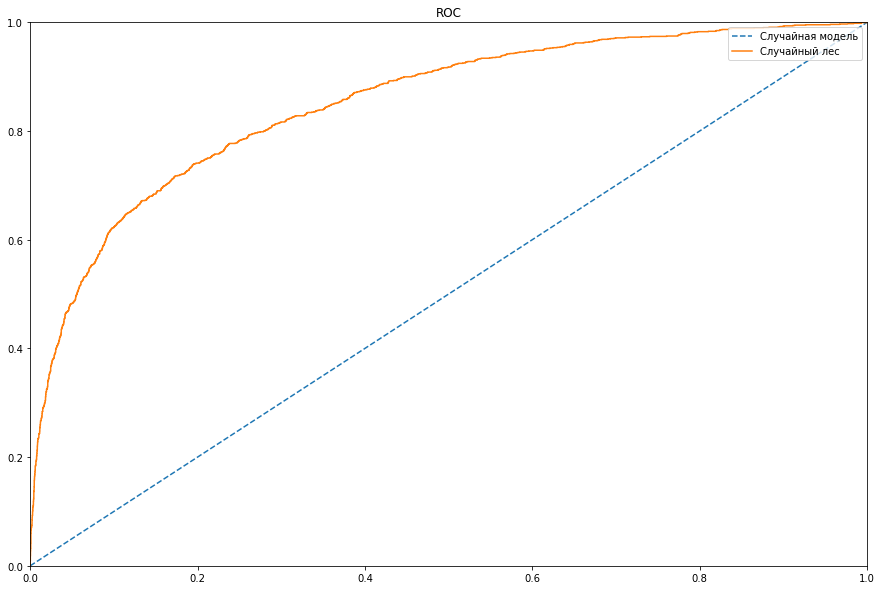

In [44]:
plt.figure()

plt.figure(figsize=(15,10))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_forest,tpr_forest)
plt.title('ROC')
plt.legend(('Случайная модель','Случайный лес'),
           loc= 'upper right') 
plt.show()

In [45]:
rezult1={'Дерево Решения':np.array([0.566,0.560]),'Случайный лес':np.array([0.605,0.618]),'Логистическая регрессия':np.array([0.348,0.483])}
rezult_df=pd.DataFrame(rezult1,index=['без учета дисбаланса','с учетом дисбаланса'])

rezult_df

,Дерево Решения,Случайный лес,Логистическая регрессия
без учета дисбаланса,0.566,0.605,0.348
с учетом дисбаланса,0.560,0.618,0.483


Модель "Случайный лес" с учетом дисбаланса достигла нужного параметра (F1 > 0.59)

С точки зрения бизнеса, полученная модель поможет маркетологам лучше определять клентов, которые могут уйти в ближайшее время. Важно, что модель покрывает большое количество клиентов.

Для улучшения модели следует использовать данные, отражающие отношения клиента с банком в динамике.